In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read-in
df_southAfrica = pd.read_csv("southAfrica.csv")
df_zimbabwe = pd.read_csv("zimbabwe.csv")
df_zambia = pd.read_csv("zambia.csv")

# Zimbabwe missing "age_group" column, so add it here
age_group = df_southAfrica["age_group"]
df_zimbabwe["age_group"] = age_group

In [3]:
dfs = [df_southAfrica, df_zimbabwe, df_zambia]
catted = pd.concat([d.set_index('age_group') for d in dfs], axis=1, keys=['SA', 'ZM', 'ZA'])
catted = catted.rename_axis(['Source', 'Column'], axis=1)

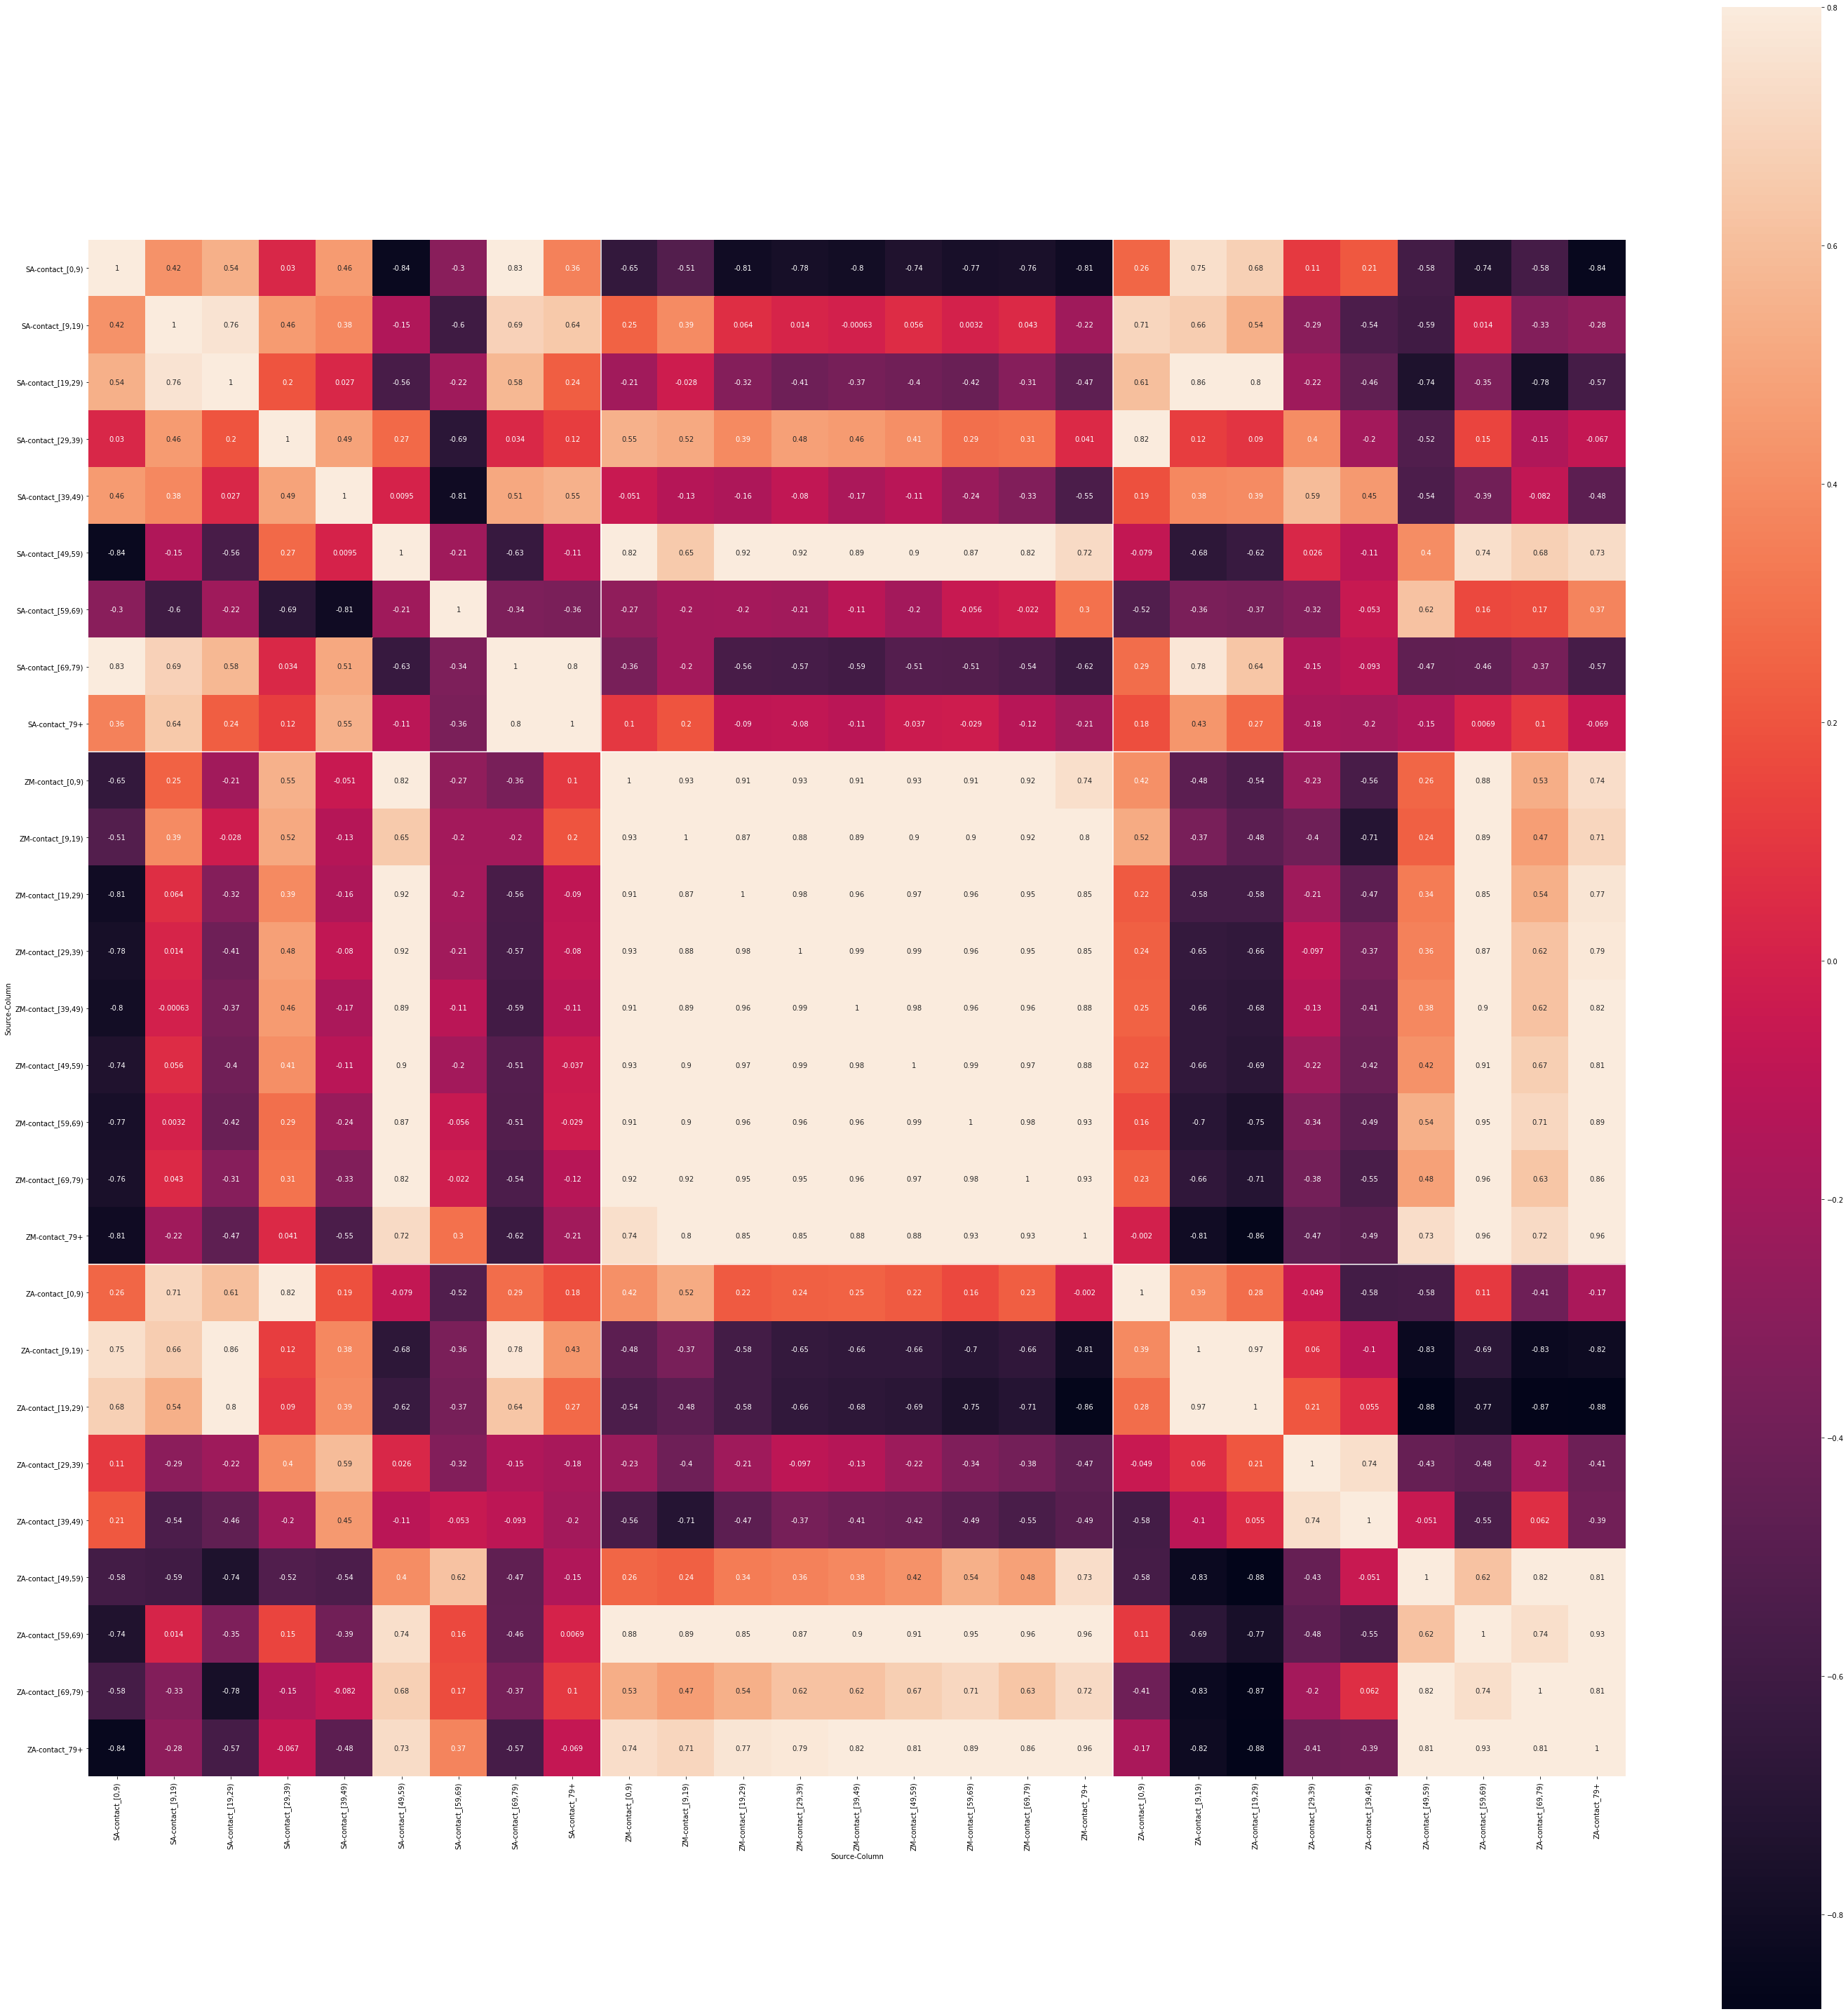

In [4]:
corrmat = catted.corr()
plt.rcParams["figure.figsize"] = (40,40)
f, ax = plt.subplots()

sns.heatmap(corrmat, vmax=.8, square=True, annot = True)

sources = corrmat.columns.get_level_values(0)
for i, source in enumerate(sources):
    if i and source != sources[i - 1]:
        ax.axhline(len(sources) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

In [ ]:
# extra code

In [ ]:
df_southAfrica = pd.read_csv("southAfrica.csv")
df_zimbabwe = pd.read_csv("zimbabwe.csv")
df_zambia = pd.read_csv("zambia.csv")

# Zimbabwe missing "age_group" column, so add it here
age_group = df_southAfrica["age_group"]

# ...and Re-index all dfs
df_southAfrica = df_southAfrica.set_index('age_group')
df_zambia = df_zambia.set_index('age_group')
df_zimbabwe = df_zimbabwe.set_index(age_group)

corr = np.corrcoef(df_zambia,df_southAfrica)
correlation_mat = corr

plt.rcParams["figure.figsize"] = (40,40)

sns.heatmap(correlation_mat, annot = True)
#sns.heatmap(corr, vmax=.8, square=True)

plt.show()

In [ ]:
corr = np.corrcoef(df_zambia,df_southAfrica)
for i in range(corr.shape[0]):
    for j in range(corr.shape[0]):
        print(f'{i}:{j} = {corr[i][j]}')

In [ ]:
df_zambia.corrwith(df_zimbabwe, axis = 1)

In [ ]:
df_zambia.compare(df_southAfrica)